<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">


# <center> **Nodule classification challenge!** </center>

In [13]:
#@title Install packages
!pip install --upgrade gdown --q

In [14]:
#@title Imports
import os
import gc
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
!gdown --id 18wuVYG6jVnAI0PJcJO4sJyZtDTs5FbpJ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=18wuVYG6jVnAI0PJcJO4sJyZtDTs5FbpJ
From (redirected): https://drive.google.com/uc?id=18wuVYG6jVnAI0PJcJO4sJyZtDTs5FbpJ&confirm=t&uuid=2b5d3e3c-a914-4980-8cdc-382525b10862
To: /content/nodules_classification_train_data.npy
100% 785M/785M [00:11<00:00, 66.1MB/s]


In [16]:
#@title # Download the dataset
!wget https://drive.google.com/uc?id=18wuVYG6jVnAI0PJcJO4sJyZtDTs5FbpJ # Train data
!gdown https://drive.google.com/uc?id=1oLsKDoXMLKBzYEdH4mdIvDjJssHYXW2v # Train labels


--2024-10-26 05:21:44--  https://drive.google.com/uc?id=18wuVYG6jVnAI0PJcJO4sJyZtDTs5FbpJ
Resolving drive.google.com (drive.google.com)... 64.233.181.100, 64.233.181.139, 64.233.181.102, ...
Connecting to drive.google.com (drive.google.com)|64.233.181.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=18wuVYG6jVnAI0PJcJO4sJyZtDTs5FbpJ [following]
--2024-10-26 05:21:44--  https://drive.usercontent.google.com/download?id=18wuVYG6jVnAI0PJcJO4sJyZtDTs5FbpJ
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.132.132, 2607:f8b0:4001:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.132.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2397 (2.3K) [text/html]
Saving to: ‘uc?id=18wuVYG6jVnAI0PJcJO4sJyZtDTs5FbpJ.1’

uc?id=18wuVYG6jVnAI 100%[===================>]   2.34K  --.-KB/s    in 0s      

2024-10-26 05:21:45 (3

In [19]:
#@title # Load the dataset
X_train = np.load("/content/nodules_classification_train_data.npy")
y_train = np.load("/content/nodules_classification_train_labels.npy")


In [18]:
print(f'This dataset contains {X_train.shape[0]} images of {X_train.shape[1:4]} pixels')
print(f'And {y_train.shape[0]} binary labels')

This dataset contains 2994 images of (512, 512) pixels
And 2994 binary labels



# **Classification application**
### **Pulmonary nodules classification**

A very important task is the automate pulmonary nodules detection and segmentation. The task of classify, identify each pulmonary nodule is very importante in the clinical task, such as characterize and quantificate the nodules texture, size (due to it ranges from 3 - 30 millimeters) and morphology.

<center>
<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs11547-019-01130-9/MediaObjects/11547_2019_1130_Fig1_HTML.png" width="1000">
</center>







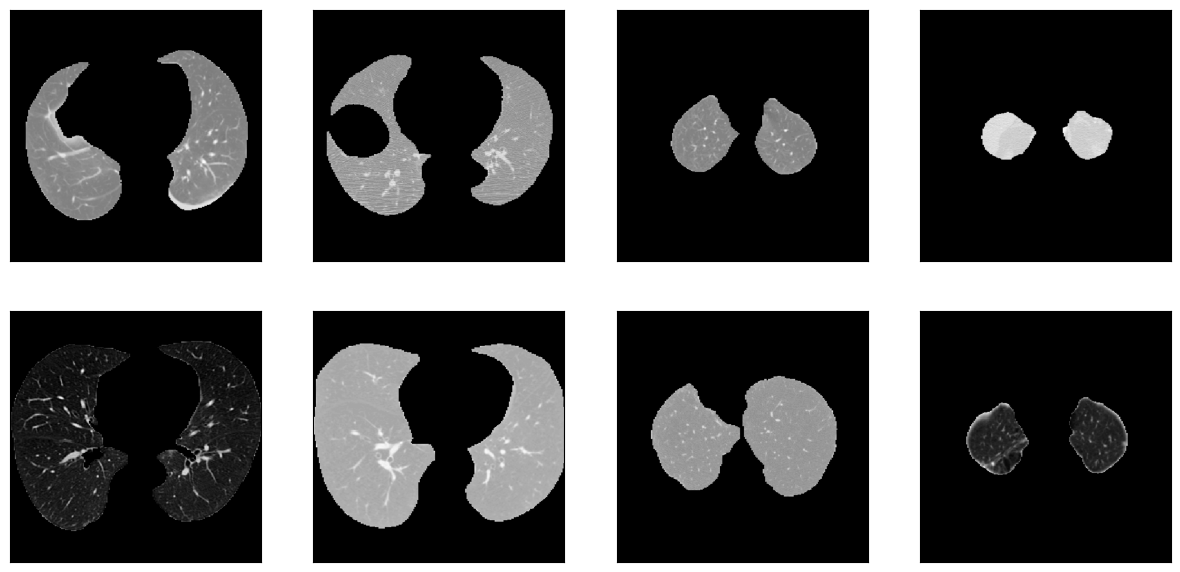

In [7]:
#@title **CODE:** It is time to show some pulmonary nodules examples...

plt.figure(figsize=(15,15))
plt.subplot(441), plt.imshow(X_train[1], cmap = 'gray'), plt.xticks([]), plt.yticks([]);
plt.subplot(442), plt.imshow(X_train[2], cmap = 'gray'), plt.xticks([]), plt.yticks([]);
plt.subplot(443), plt.imshow(X_train[3], cmap = 'gray'),plt.xticks([]), plt.yticks([]);
plt.subplot(444), plt.imshow(X_train[8], cmap = 'gray'),plt.xticks([]), plt.yticks([]);
plt.subplot(445), plt.imshow(X_train[50], cmap = 'gray'), plt.xticks([]), plt.yticks([]);
plt.subplot(446), plt.imshow(X_train[100], cmap = 'gray'), plt.xticks([]), plt.yticks([]);
plt.subplot(447), plt.imshow(X_train[200], cmap = 'gray'),plt.xticks([]), plt.yticks([]);
plt.subplot(448), plt.imshow(X_train[500], cmap = 'gray'),plt.xticks([]), plt.yticks([]);

In [21]:
#@title Reshape images
X_train = np.expand_dims(X_train, axis=3)
X_train= tf.image.resize(X_train, (224, 224)).numpy()

print(f'New size of images is {X_train.shape[1:4]}')

New size of images is (224, 224, 1)


In [22]:
#@title Create **your** model (The input image size MUST be 224x224x1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Parámetros del modelo
input_shape = (224, 224, 1)  # Dimensión de entrada ajustada a 224x224x1
num_classes = 2  # Ajusta según la cantidad de clases

# Construcción del modelo CNN
model = Sequential()

# Primera capa convolucional + Batch Normalization + MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Segunda capa convolucional + Batch Normalization + MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Tercera capa convolucional + Batch Normalization + MaxPooling
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Cuarta capa convolucional + Batch Normalization + MaxPooling
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Aplanamiento de las características
model.add(Flatten())

# Capa densa con Dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Capa de salida
model.add(Dense(num_classes, activation='softmax'))

# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,235,586 (50.49 MB)

 Trainable params: 13,234,626 (50.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [23]:
#@title Train and save your h5 model (the name MUST be your student code. Ex: 2208231.h5)

# Ajuste de hiperparámetros
epochs = 10  # Ajusta según sea necesario
batch_size = 32  # Ajusta según sea necesario

# Entrenamiento del modelo (asegúrate de que X_train y y_train estén definidos)
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[checkpoint]
)

# Guardar el modelo final en formato .h5
model.save(model_filename)
print(f"Modelo guardado como {model_filename}")

#Save the entire model, including the structure (do NOT use model.save_weights)
model.save('2182693.h5')

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5592 - loss: 2.9653
Epoch 1: val_accuracy improved from -inf to 0.59432, saving model to 2182693.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 532s 7s/step - accuracy: 0.5594 - loss: 2.9457 - val_accuracy: 0.5943 - val_loss: 0.6605
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5927 - loss: 0.6513
Epoch 2: val_accuracy did not improve from 0.59432
75/75 ━━━━━━━━━━━━━━━━━━━━ 531s 7s/step - accuracy: 0.5927 - loss: 0.6512 - val_accuracy: 0.5743 - val_loss: 0.6571
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6222 - loss: 0.6193
Epoch 3: val_accuracy did not improve from 0.59432
75/75 ━━━━━━━━━━━━━━━━━━━━ 539s 7s/step - accuracy: 0.6220 - loss: 0.6195 - val_accuracy: 0.5810 - val_loss: 0.6460
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6303 - loss: 0.6110
Epoch 4: val_accuracy improved from 0.59432 to 0.61937, saving model to 2182693.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 567s 7s/step - accurac

Modelo guardado como 2182693.h5


In [29]:
from google.colab import files

# Descargar el archivo .h5
files.download('2182693.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

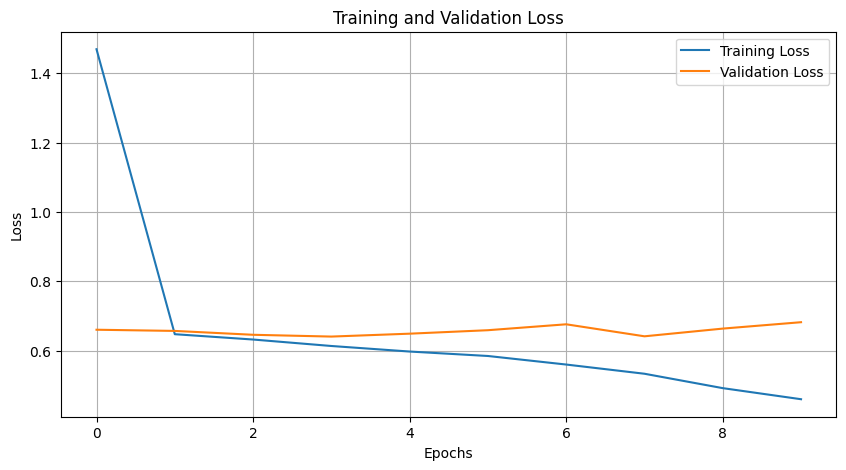

In [27]:
#@title Plot the training and the validation loss. Do you get overfitting?
import matplotlib.pyplot as plt

# Función para graficar las pérdidas de entrenamiento y validación
def plot_training_history(history):
    # Graficar la pérdida de entrenamiento y validación
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función de graficación
plot_training_history(history)



### Conclusiones:

1. **Sobreajuste evidente**: La pérdida de validación es constante o aumenta, mientras que la de entrenamiento sigue disminuyendo. El modelo aprende patrones específicos de los datos de entrenamiento pero no generaliza bien.

2. **Diversidad de datos**: Es probable que el conjunto de datos no sea lo suficientemente diverso, lo que afecta la capacidad del modelo para manejar datos no vistos.


94/94 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step
Accuracy: 0.82
Precision: 0.82
Recall: 0.82


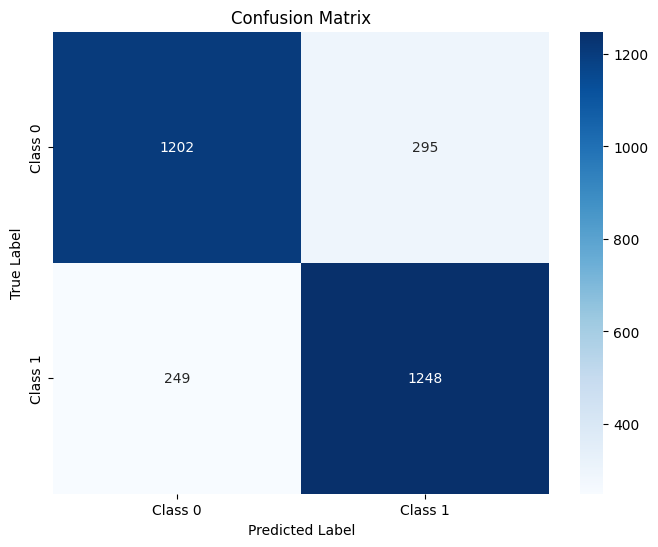

In [28]:
#@title Compute your metrics (Confusion matrix, precision, recall and accuracy).
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predecir en los datos de entrenamiento
y_pred = model.predict(X_train)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred_classes)

# Calcular precisión, recall y exactitud
precision = precision_score(y_train, y_pred_classes, average='weighted')
recall = recall_score(y_train, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_train, y_pred_classes)

# Imprimir métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




<br><br><br><br><br>

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>